---
title: Multivariate Statistics
subtitle: Foundations of Statistical Analysis in Python
abstract: This notebook explores multivariate relationships through linear regression analysis, highlighting its strengths and limitations. Practical examples and visualizations are provided to help users understand and apply these statistical concepts effectively.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-05-25
---

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here we will discuss:
- Measurement of the relationship between distributions using **linear, regression analysis**.

## Importing relevant libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [5]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [6]:
import pandas as pd
df_estate = pd.read_csv("data/models/real_estate.csv")
df_estate.head(5)

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


## Describing *multivariate* data with regression models

- So far, we've been focusing on *univariate and bivariate data*: analysis.
- What if we want to describe how *two or more than two distributions* relate to each other?

1. Let's simplify variables' names:

In [7]:
df_estate = df_estate.rename(columns={
    'house age': 'house_age_years',
    'house price of unit area': 'price_twd_msq',
    'number of convenience stores': 'n_convenience',
    'distance to the nearest MRT station': 'dist_to_mrt_m'
})

df_estate.head(5)

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


We can also perform binning for "house_age_years":

In [8]:
df_estate['house_age_cat'] = pd.cut(
    df_estate['house_age_years'],
    bins=[0, 15, 30, 45],
    include_lowest=True,
    right=False
)
df_estate.head(5)

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)"
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)"
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)"
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)"
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)"


In [9]:
cat_dict = {
    pd.Interval(left=0, right=15, closed='left'): '0-15',
    pd.Interval(left=15, right=30, closed='left'): '15-30',
    pd.Interval(left=30, right=45, closed='left'): '30-45'
}

df_estate['house_age_cat_str'] = df_estate['house_age_cat'].map(cat_dict)
df_estate['house_age_cat_str'] = df_estate['house_age_cat_str'].astype('category')
df_estate.head()

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat,house_age_cat_str
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)",30-45
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)",15-30
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)",0-15
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)",0-15
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)",0-15


In [10]:
#Checking the updated datatype of house_age_years
df_estate.house_age_cat_str.dtype

CategoricalDtype(categories=['0-15', '15-30', '30-45'], ordered=True, categories_dtype=object)

In [11]:
#Checking the dataframe for any NA values
df_estate.isna().any()

No                   False
house_age_years      False
dist_to_mrt_m        False
n_convenience        False
latitude             False
longitude            False
price_twd_msq        False
house_age_cat        False
house_age_cat_str    False
dtype: bool

## Descriptive Statistics

Prepare a heatmap with correlation coefficients on it:

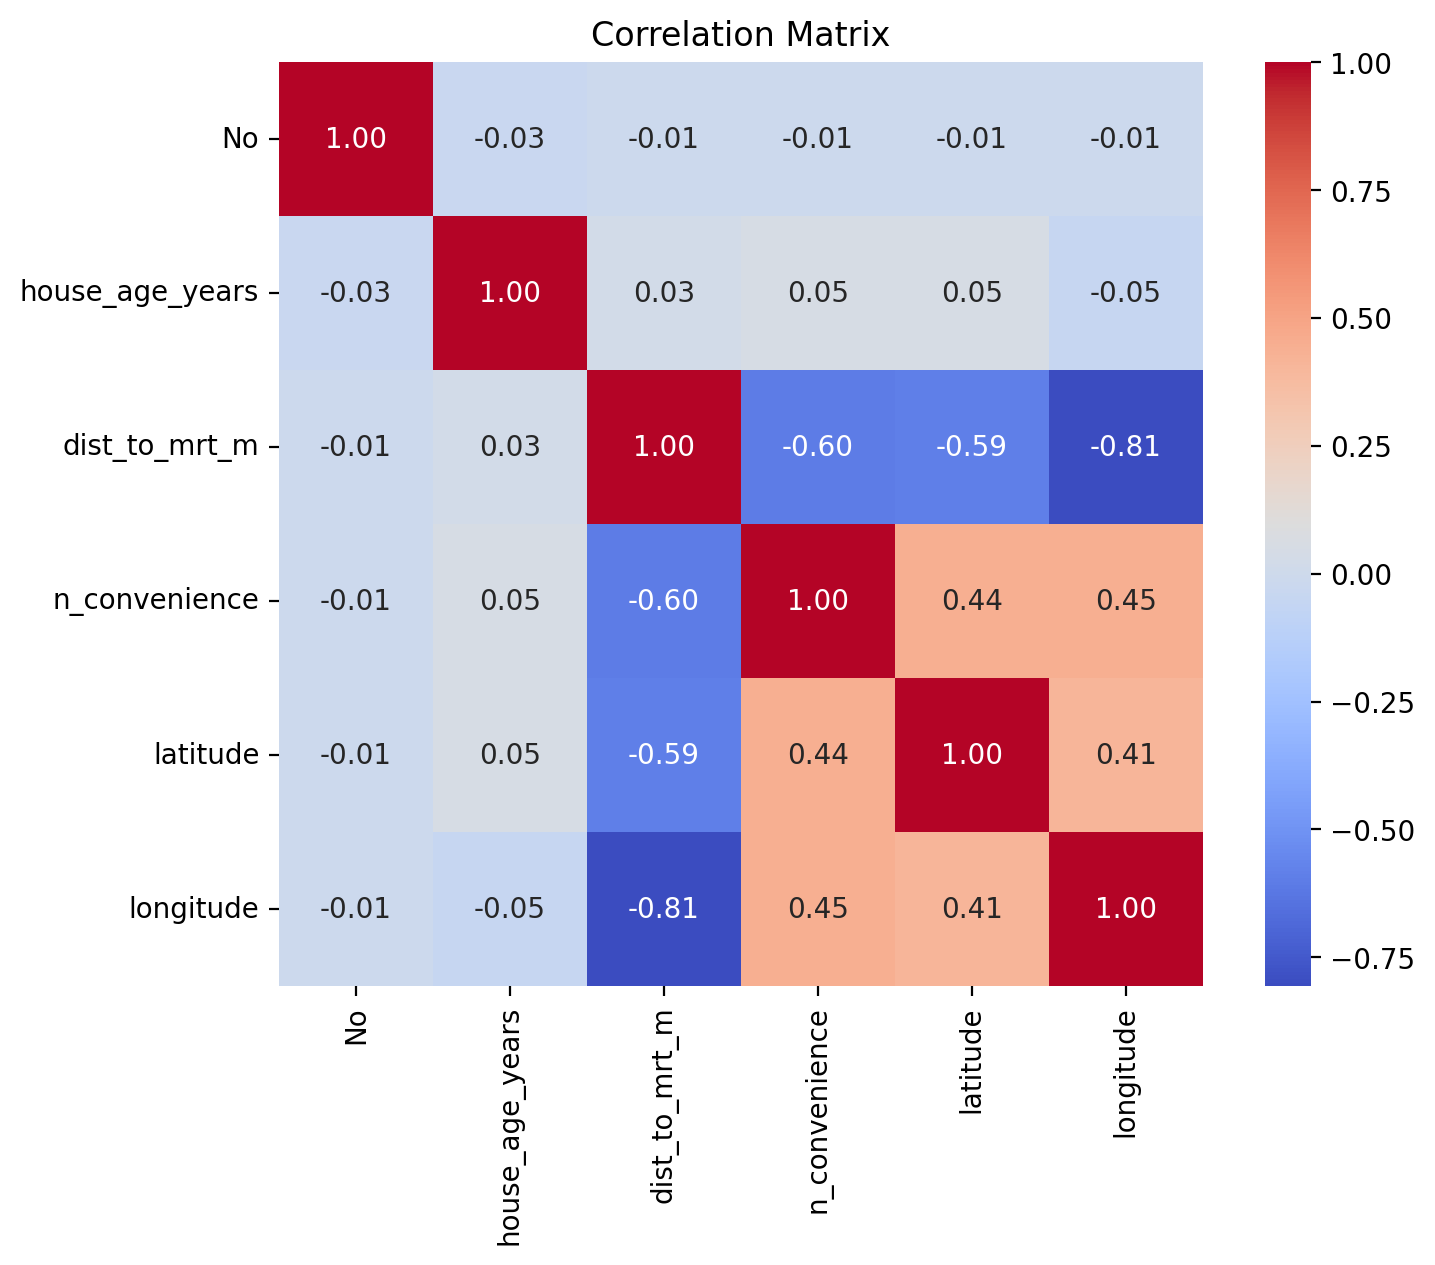

In [12]:
corr_matrix = df_estate.iloc[:, :6].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

Draw a scatter plot of n_convenience vs. price_twd_msq:

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

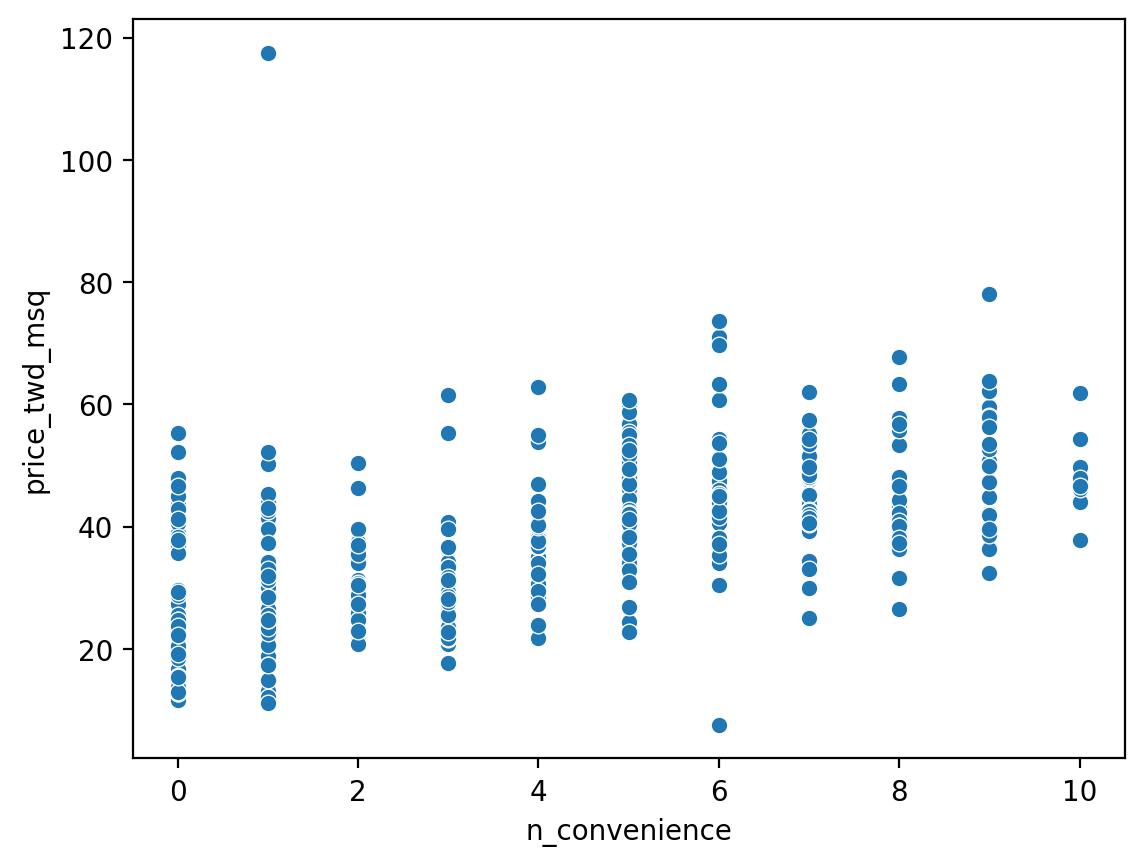

In [13]:
sns.scatterplot(data = df_estate, x = "n_convenience", y = "price_twd_msq")

Draw a scatter plot of house_age_years vs. price_twd_msq:

<Axes: xlabel='house_age_years', ylabel='price_twd_msq'>

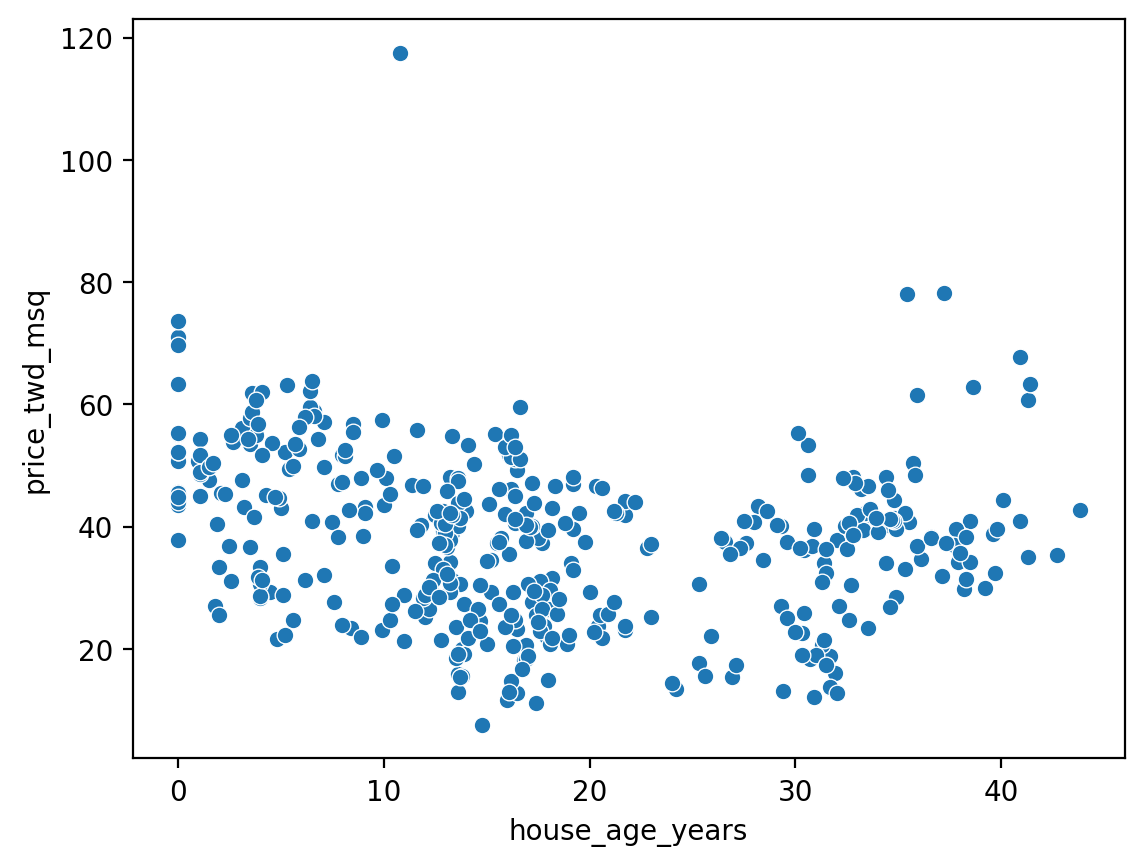

In [14]:
# Your code here
sns.scatterplot(data = df_estate, x = "house_age_years", y = "price_twd_msq")

Draw a scatter plot of distance to nearest MRT station vs. price_twd_msq:

<Axes: xlabel='dist_to_mrt_m', ylabel='price_twd_msq'>

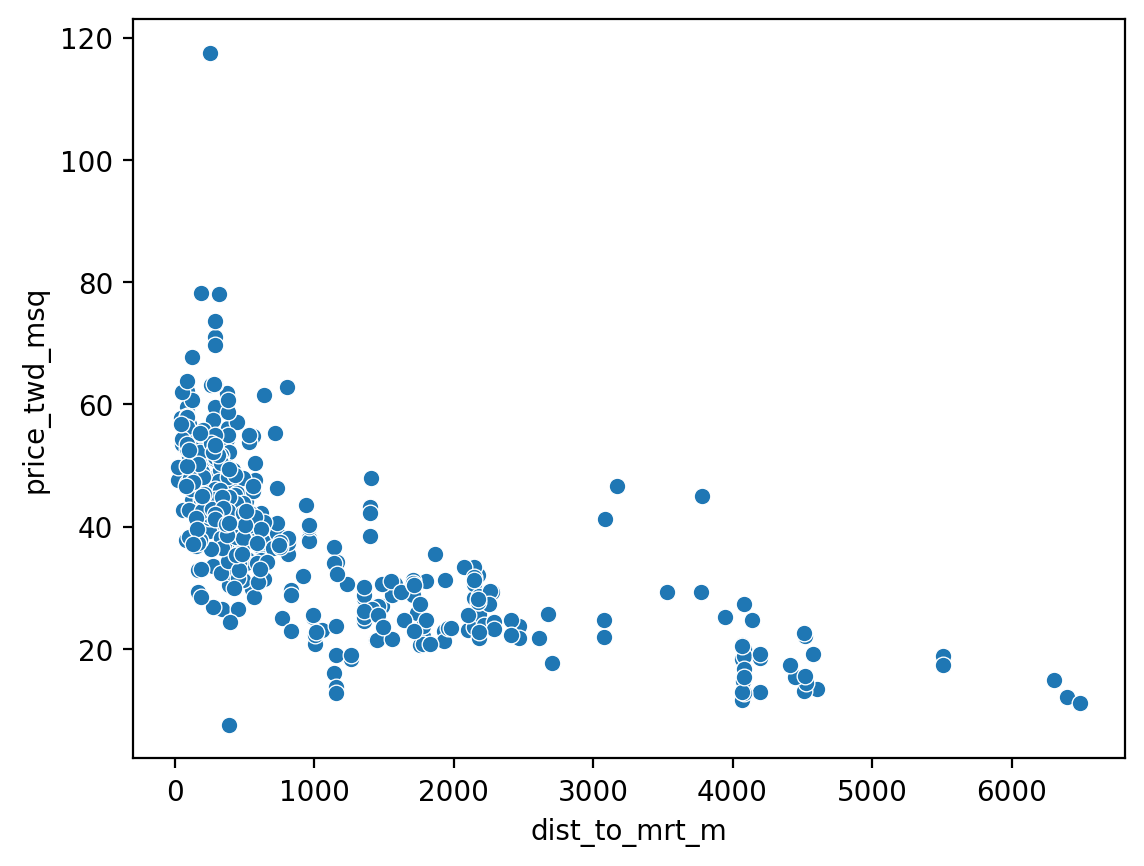

In [15]:
# Your code here
sns.scatterplot(data = df_estate, x = "dist_to_mrt_m", y = "price_twd_msq")

Plot a histogram of price_twd_msq with 10 bins, facet the plot so each house age group gets its own panel:

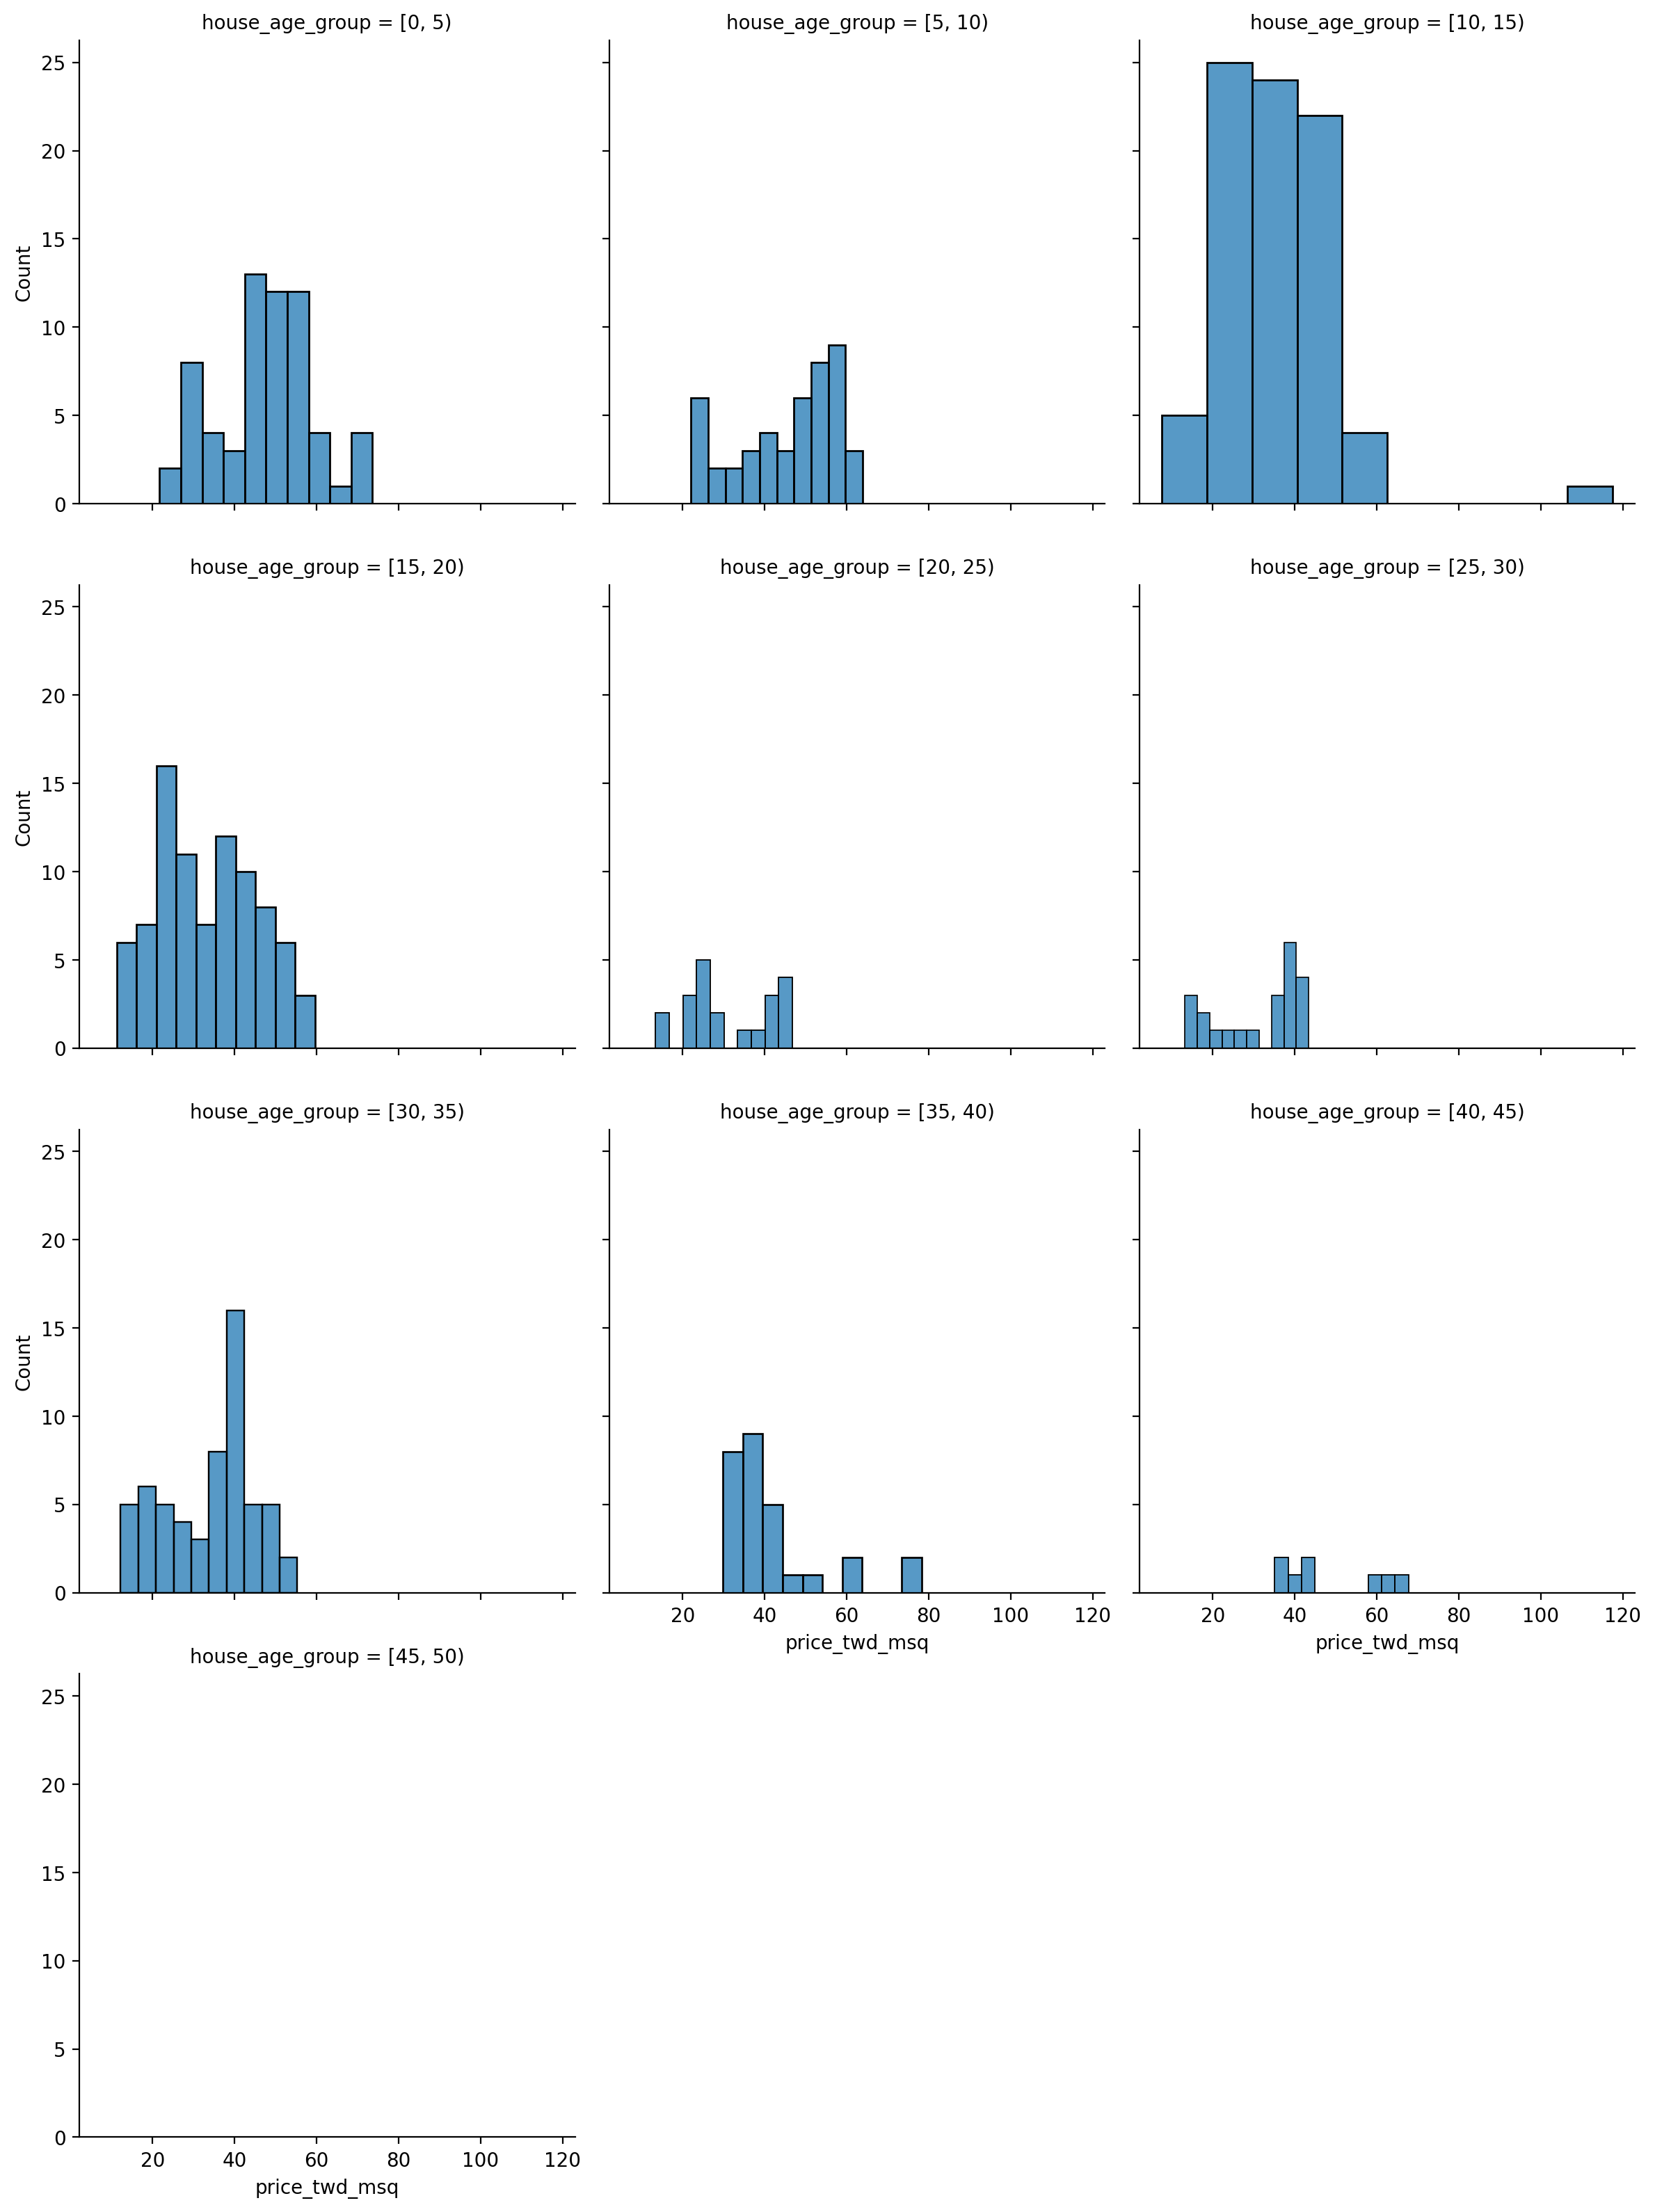

In [16]:
# Your code here
df_estate['house_age_group'] = pd.cut(
    df_estate['house_age_years'],
    bins=range(0, 51, 5),  # Create bins of width 5 years from 0 to 50
    right=False,
    include_lowest=True
)
# Create the faceted histogram
g = sns.FacetGrid(df_estate, col='house_age_group', col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='price_twd_msq', bins=10, kde=False)

Summarize to calculate the mean, sd, median etc. house price/area by house age:

In [17]:
# Your code here
summary_stats = df_estate.groupby('house_age_group', observed=False)['price_twd_msq'].agg(
    count='count',
    mean='mean',
    std='std',
    median='median',
    min='min',
    max='max'
).reset_index()

#grouping by individual years produces NaN std, so it seems pointless

print(summary_stats.head())


  house_age_group  count       mean        std  median   min    max
0          [0, 5)     63  47.358730  11.792571   47.70  21.7   73.6
1         [5, 10)     46  45.647826  12.532017   49.40  22.0   63.9
2        [10, 15)     81  35.213580  14.180936   34.10   7.6  117.5
3        [15, 20)     86  33.289535  11.913957   32.25  11.2   59.6
4        [20, 25)     21  31.361905  10.674993   27.70  13.4   46.7


## Simple model

Run a linear regression of price_twd_msq vs. best, but only 1 predictor:

In [18]:
import statsmodels.api as sm

# Let's use 'dist_to_mrt_m' as the single best predictor
X = df_estate[['dist_to_mrt_m']]
y = df_estate['price_twd_msq']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model1 = sm.OLS(y, X).fit()

# Show the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Thu, 29 May 2025   Prob (F-statistic):           4.64e-56
Time:                        16:09:58   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.8514      0.653     70.258

What do the above results mean? Write down the model and interpret it.

Discuss model accuracy.

Regression Equation

Based on the output: price_twd_msq=45.8514−0.0073⋅dist_to_mrt_m

Interpretation of Coefficients

    Intercept (const = 45.8514):
    When dist_to_mrt_m is 0 (i.e., the property is right next to the MRT station), the predicted price is 45.85 TWD per square meter.

    Slope for dist_to_mrt_m (-0.0073):
    For each additional meter of distance from the MRT station, the property price per square meter decreases by 0.0073 TWD.
    This negative coefficient indicates an inverse relationship between proximity to public transport and price — the farther the property is from the MRT, the cheaper it is.

Statistical Significance

    P-values:

        Both the intercept and the distance variable are highly significant (P < 0.0001), suggesting the relationship is not due to random chance.

    F-statistic = 342.2 and Prob(F) = 4.64e-56:
    Indicates that the model as a whole is statistically significant.

Model Accuracy & Diagnostics

    R-squared = 0.454:
    About 45.4% of the variation in property prices is explained by the distance to the MRT station. For a single-variable model, this is a moderate level of explanatory power. There’s still 54.6% of the variation left unexplained, likely due to other important variables (e.g., building age, floor level, neighborhood, etc.).

    Adjusted R-squared = 0.452:
    Almost the same as R-squared, which makes sense given there is only one predictor.

    Durbin-Watson = 2.151:
    Suggests no serious autocorrelation in residuals (value close to 2 is good).

    Skewness & Kurtosis:
    The residuals are highly skewed (1.263) and heavy-tailed (kurtosis = 10.135), suggesting that the residuals are not normally distributed, which may violate OLS assumptions. This could affect inference and model performance.

    Omnibus and Jarque-Bera Tests (p-values near 0):
    Further confirm that the residuals deviate from normality, which limits how much we can trust confidence intervals and p-values.

    Condition Number (2.19e+03):
    A bit high, but since this is a single-variable model, multicollinearity isn't a real concern here. The message is more relevant in models with multiple predictors.

## Model diagnostics

### 4 Diagnostic plots

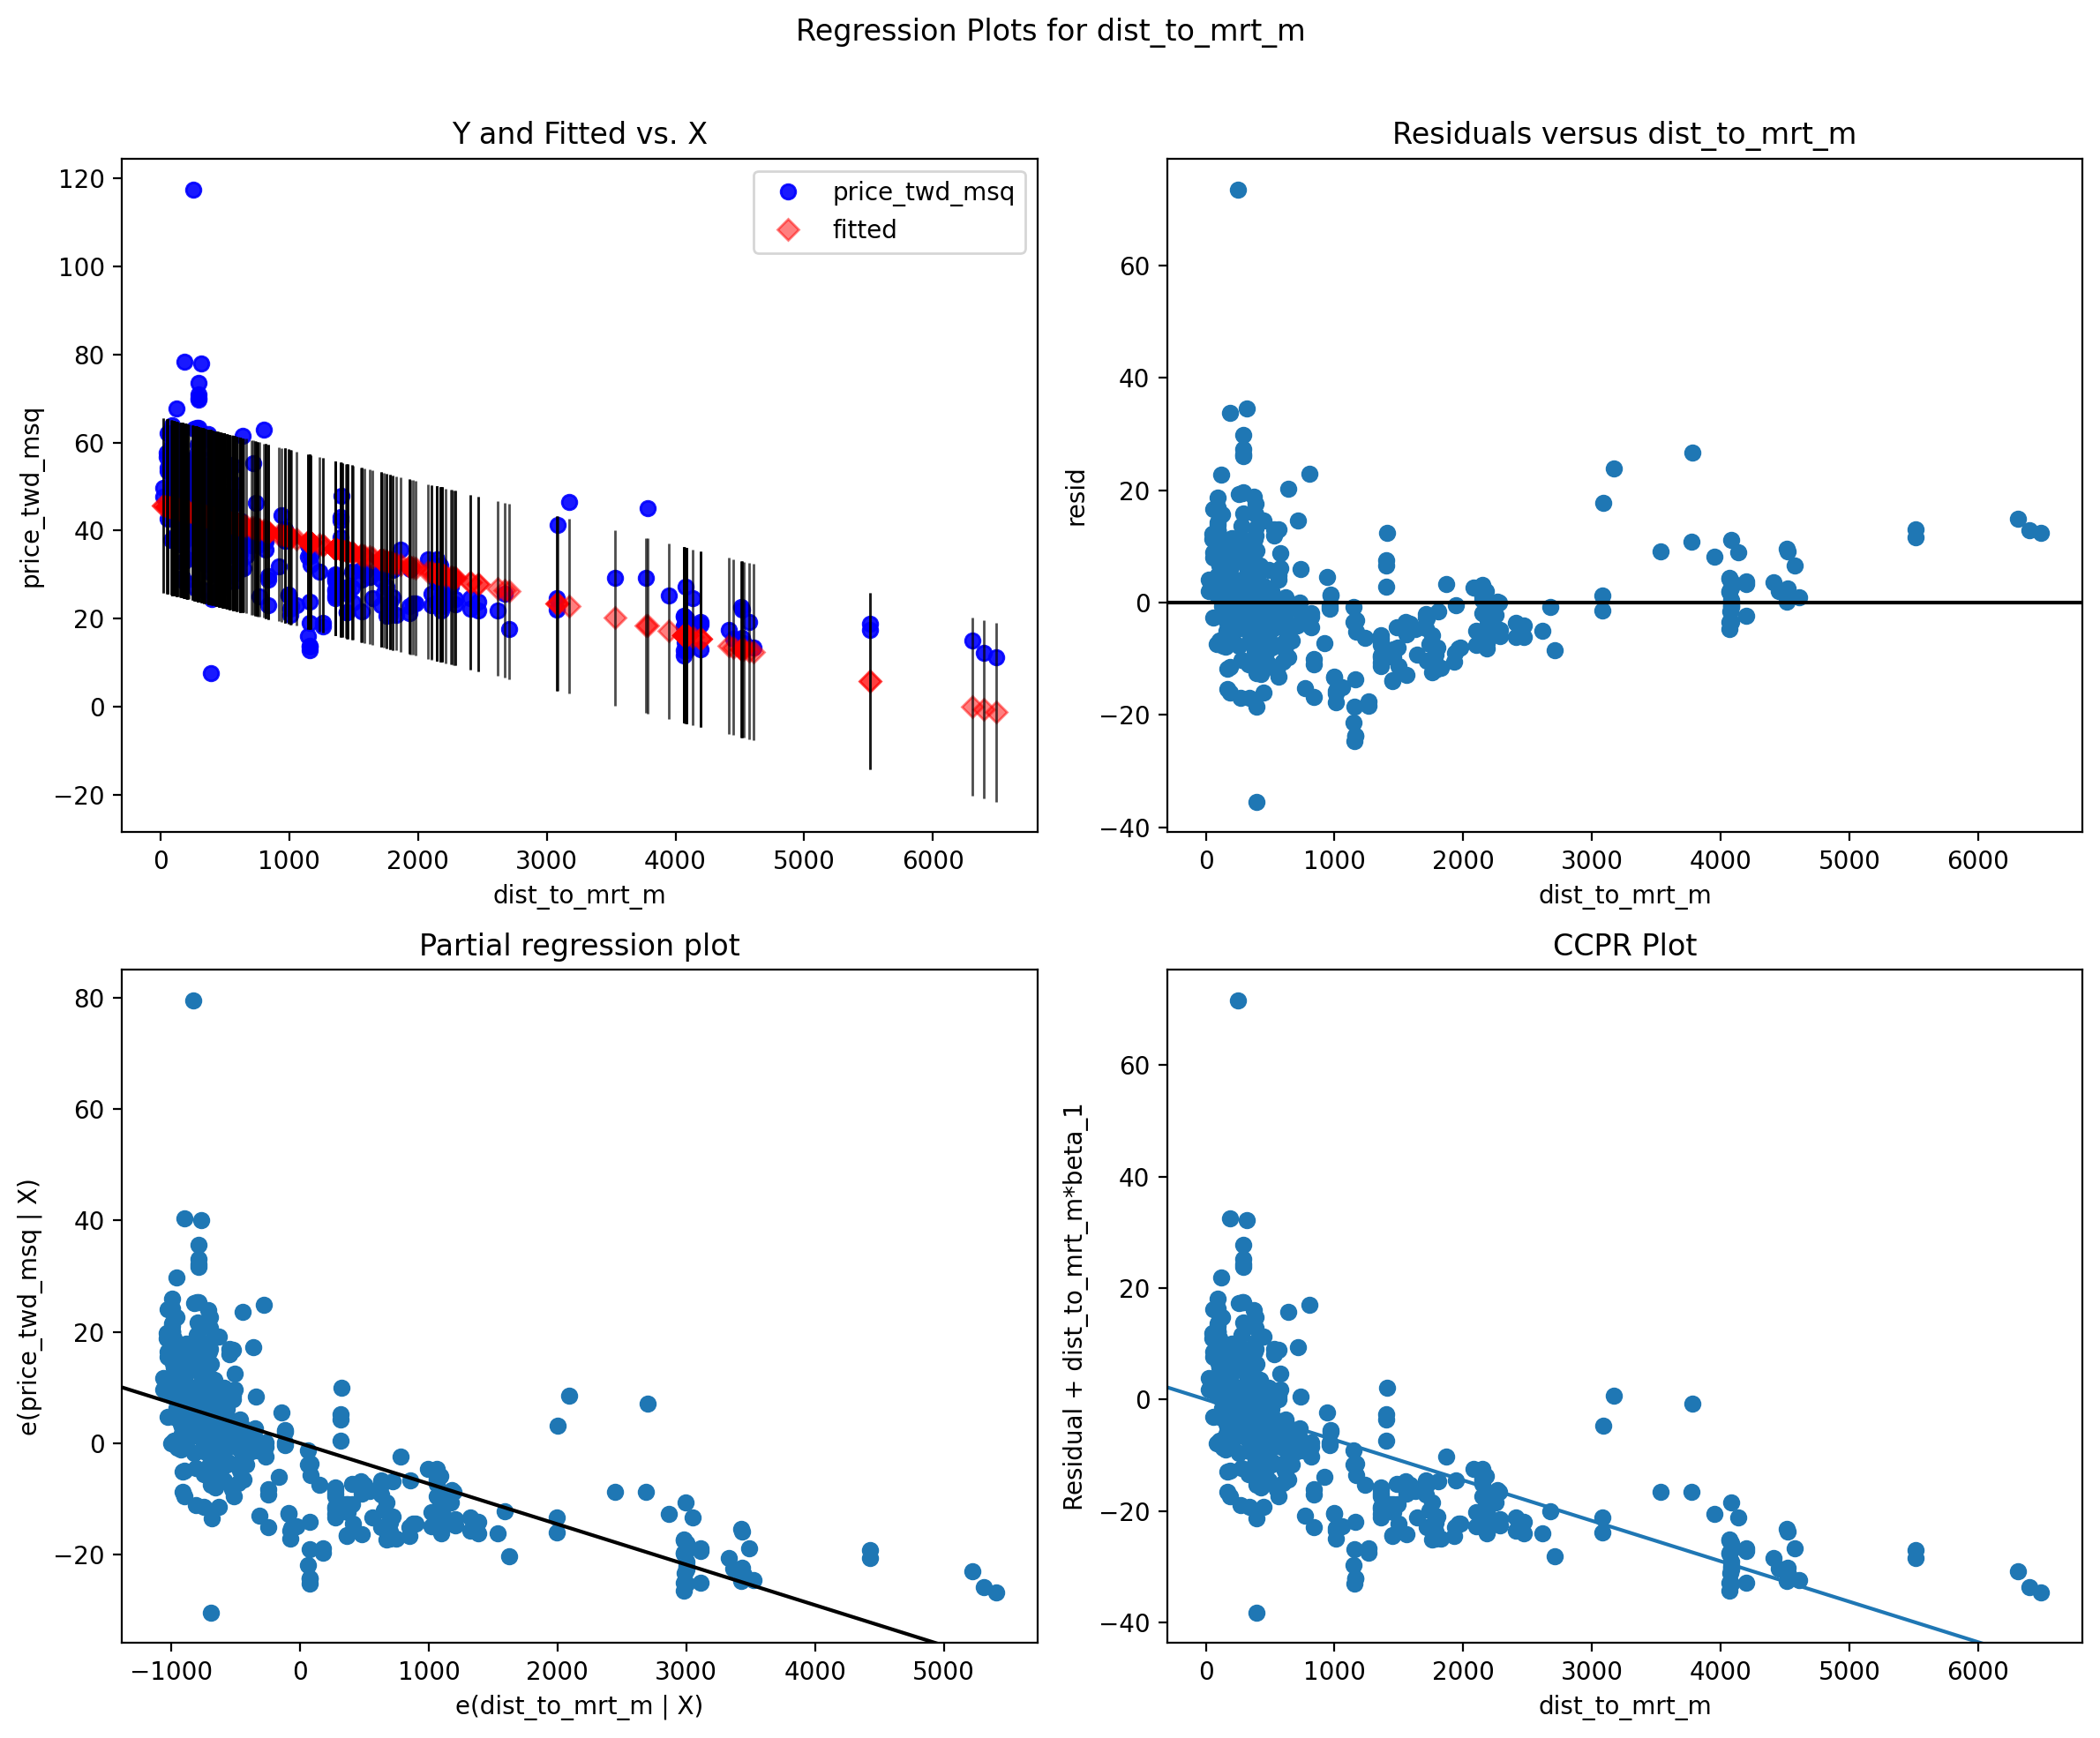

In [19]:
fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(model1, 'dist_to_mrt_m', fig=fig)
plt.show()

The four plots show...

Top Left: "Y and Fitted vs. X" (Observed vs. Fitted Values)

    Blue dots: Actual observed values of price_twd_msq.

    Red diamonds: Predicted (fitted) values from the regression.

    Black lines: Vertical distances between observed and fitted values (i.e., the residuals).

Interpretation:

    The fitted values form a clear downward trend — confirming the negative relationship.

    There is substantial spread around the line, especially for low dist_to_mrt_m, suggesting variance is not constant (potential heteroscedasticity).

    Some prices are significantly higher or lower than predicted, indicating outliers or influential points.

Top Right: "Residuals vs. X"

    Plots residuals (errors) on the y-axis against dist_to_mrt_m on the x-axis.

Interpretation:

    Ideally, residuals should be randomly scattered around zero with no clear pattern — this would confirm the linear model's assumptions.

    However, you can see a funnel-shaped pattern: residuals are more spread out at lower distances and less spread at higher distances.

        This indicates heteroscedasticity — a violation of constant variance assumption.

        May suggest the need for log-transforming distance or using robust standard errors.

Bottom Left: Partial Regression Plot

    Also known as added variable plot.

    It shows the unique contribution of dist_to_mrt_m to explaining price_twd_msq, after removing the effects of other predictors. Since this is a single-variable model, it resembles a regular scatter plot with a fitted line.

Interpretation:

    Reinforces that there is a strong negative linear relationship.

    The spread around the line and outliers suggest the relationship is not perfectly linear and there may be influential data points.

Bottom Right: CCPR Plot (Component and Component Plus Residual Plot)

    A variation of the partial regression plot.

    Shows the combined effect of the predictor (dist_to_mrt_m) and its residual component.

Interpretation:

    Confirms the downward trend in the relationship.

    Again, shows a non-uniform spread (especially near the origin), highlighting non-linearity or outliers.

### Outliers and high levarage points:

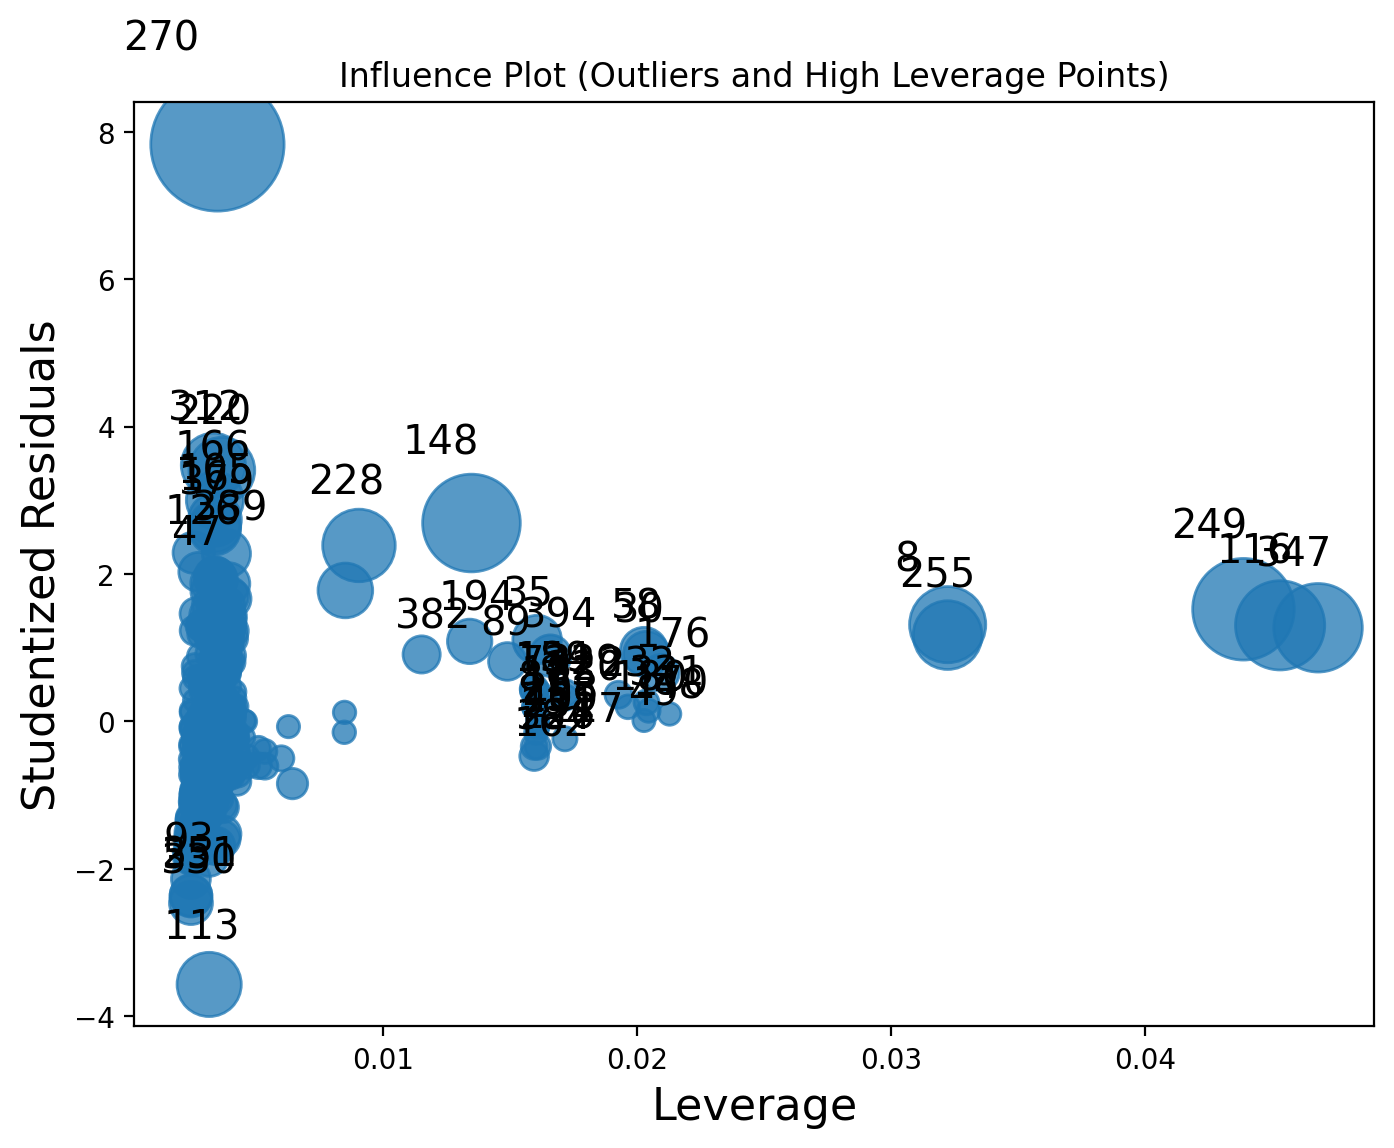

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")
plt.title("Influence Plot (Outliers and High Leverage Points)")
plt.show()

Discussion:

| Feature                         | Example from Plot                                                  | Interpretation                                                                  |
| ------------------------------- | ------------------------------------------------------------------ | ------------------------------------------------------------------------------- |
| **Point 270** (Top-left bubble) | Studentized residual > 8, small leverage, **huge Cook's Distance** | **Major outlier**. Strong influence on the model despite low leverage.       |
| **Points 249, 154, 157**        | High leverage, mid-to-large Cook's Distance                        | **High-leverage influential points**. These might skew the regression slope. |
| **Others (like 148, 255, 8)**   | Moderate residuals and leverage                                    | Worth reviewing — could still influence fit subtly.                          |



## Multiple Regression Model

### Test and training set 

We begin by splitting the dataset into two parts, training set and testing set. In this example we will randomly take 75% row in this dataset and put it into the training set, and other 25% row in the testing set:

In [21]:
# One-hot encoding for house_age_cat_str in df_estate

encode_dict = {True: 1, False: 0}

house_age_0_15 = df_estate['house_age_cat_str'] == '0-15'
house_age_15_30 = df_estate['house_age_cat_str'] == '15-30'
house_age_30_45 = df_estate['house_age_cat_str'] == '30-45'

df_estate['house_age_0_15'] = house_age_0_15.map(encode_dict)
df_estate['house_age_15_30'] = house_age_15_30.map(encode_dict)
df_estate['house_age_30_45'] = house_age_30_45.map(encode_dict)

df_estate.head()

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat,house_age_cat_str,house_age_group,house_age_0_15,house_age_15_30,house_age_30_45
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)",30-45,"[30, 35)",0,0,1
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)",15-30,"[15, 20)",0,1,0
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)",0-15,"[10, 15)",1,0,0
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)",0-15,"[10, 15)",1,0,0
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)",0-15,"[5, 10)",1,0,0


In [23]:
from sklearn.model_selection import train_test_split

# 75% training, 25% testing, random_state=12 for reproducibility
train, test = train_test_split(df_estate, train_size=0.75, random_state=12)

Now we have our training set and testing set. 

### Variable selection methods

Generally, selecting variables for linear regression is a debatable topic.

There are many methods for variable selecting, namely, forward stepwise selection, backward stepwise selection, etc, some are valid, some are heavily criticized.

I recommend this document: <https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/26/lecture-26.pdf> and Gung's comment: <https://stats.stackexchange.com/questions/20836/algorithms-for-automatic-model-selection/20856#20856> if you want to learn more about variable selection process.

[**If our goal is prediction**]{.ul}, it is safer to include all predictors in our model, removing variables without knowing the science behind it usually does more harm than good!!!

We begin to create our multiple linear regression model:

In [24]:
import statsmodels.formula.api as smf
model2 = smf.ols('price_twd_msq ~ dist_to_mrt_m + house_age_0_15 + house_age_30_45', data = df_estate)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     128.9
Date:                Thu, 29 May 2025   Prob (F-statistic):           7.84e-59
Time:                        18:34:37   Log-Likelihood:                -1530.2
No. Observations:                 414   AIC:                             3068.
Df Residuals:                     410   BIC:                             3084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.4096      1.052     41.275      0.000      41.342      45.477
dist_to_mrt_m      -0.0070      0.000    -17.889      0.000      -0.008      -0.006
house_age_0_15      4.8450      1.143      4.239      0.000       2.598       7.092
house_age_30_45    -0.1016      1.355     -0.075      0.940      -2.765       2.562
==============================================================================
Omnibus:                      145.540   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.318
Skew:                           1.296   Prob(JB):                    1.16e-234
Kurtosis:                      10.466   Cond. No.                     6.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What about distance to mrt? Please plot its scatterplot with the dependent variable and verify, if any transformation is needed:

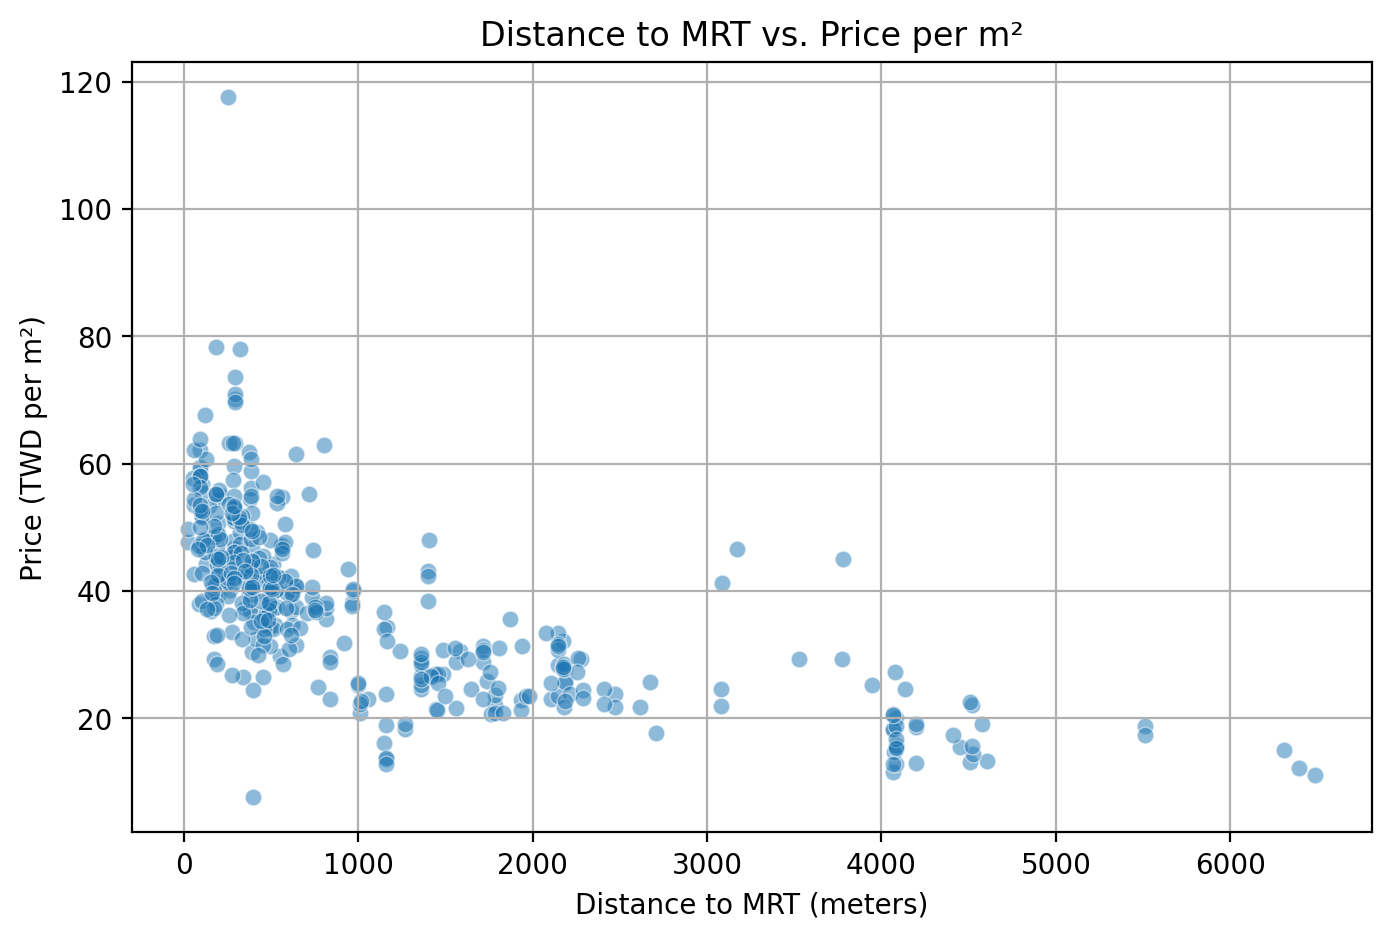

In [26]:
# Your code here
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_estate, x='dist_to_mrt_m', y='price_twd_msq', alpha=0.5)
plt.title('Distance to MRT vs. Price per m²')
plt.xlabel('Distance to MRT (meters)')
plt.ylabel('Price (TWD per m²)')
plt.grid(True)
plt.show()

In [27]:
# If any transformation is necessary, please estimate the Model3 with the transformed distance to mrt.
# Create log-transformed variable
df_estate['log_dist_to_mrt'] = np.log(df_estate['dist_to_mrt_m'])

# Fit the transformed model
import statsmodels.formula.api as smf
model3 = smf.ols('price_twd_msq ~ log_dist_to_mrt + house_age_0_15 + house_age_30_45', data=df_estate)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     174.2
Date:                Thu, 29 May 2025   Prob (F-statistic):           8.14e-73
Time:                        18:41:15   Log-Likelihood:                -1497.6
No. Observations:                 414   AIC:                             3003.
Df Residuals:                     410   BIC:                             3019.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          92.4262      2.946     

Discuss the results...



Improved Model Fit

    R-squared increased from 0.485 → 0.560.

    Adjusted R-squared: 0.557 → strong evidence the log transformation improved model explanatory power.

Distance to MRT Effect (log-transformed)

    Coefficient: -8.73
    → A 1 unit increase in log(distance) (≈ 2.72× distance) is associated with a TWD 8.73 drop per m².

    Highly significant (p < 0.001): strong predictor.

    This supports the idea that proximity has a diminishing return on price.

House Age Effects

    0–15 years: +3.46 TWD/m², significant (p = 0.001).

    30–45 years: not significant (p = 0.394), suggesting no clear effect compared to the 15–30 baseline.

Diagnostics

    Skew and kurtosis are still high → suggests non-normality or outliers in residuals.

    Durbin-Watson ~2.1: No serious autocorrelation.

    Condition Number = 45.3: No major multicollinearity.

Conclusion

    Log-transforming dist_to_mrt_m was clearly beneficial.

    It made the relationship more linear and increased model explanatory power.

    Model 3 is a better fit than Model 2 and should be preferred for interpreting the impact of MRT proximity.

In [28]:
#Calculating residual standard error of Model1
mse_result1 = model1.mse_resid
rse_result1 = np.sqrt(mse_result1)
print('The residual standard error for the above model is:',np.round(mse_result1,3))

The residual standard error for the above model is: 101.375


In [29]:
#Calculating residual standard error of Model2
mse_result2 = result2.mse_resid
rse_result2 = np.sqrt(mse_result2)
print('The residual standard error for the above model is:',np.round(rse_result2,3))

The residual standard error for the above model is: 9.796


Looking at model summary, we see that variables house_age_30_45 are insignificant, so let's estimate the model without those variables:

In [30]:
# Estimate next model here

model4 = smf.ols('price_twd_msq ~ log_dist_to_mrt + house_age_0_15', data=df_estate)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     261.1
Date:                Thu, 29 May 2025   Prob (F-statistic):           6.40e-74
Time:                        18:46:10   Log-Likelihood:                -1497.9
No. Observations:                 414   AIC:                             3002.
Df Residuals:                     411   BIC:                             3014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          91.4396      2.708     

### Evaluating multi-collinearity

There are many standards researchers apply for deciding whether a VIF is too large. In some domains, a VIF over 2 is worthy of suspicion. Others set the bar higher, at 5 or 10. Others still will say you shouldn't pay attention to these at all. Ultimately, the main thing to consider is that small effects are more likely to be "drowned out" by higher VIFs, but this may just be a natural, unavoidable fact with your model.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df_estate[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']].copy()
X_vif = X_vif.fillna(0)  # Fill missing values if any

# Add constant (intercept)
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

           feature       VIF
0            const  4.772153
1    dist_to_mrt_m  1.061497
2   house_age_0_15  1.399276
3  house_age_30_45  1.400308


Discuss the results...



The VIF values look excellent:

    All VIFs are well below 2, indicating no concerning multicollinearity.

    dist_to_mrt_m: 1.06

    house_age_0_15 & house_age_30_45: ~1.4

Even by conservative standards (e.g., VIF > 2), nothing here raises red flags. This means our coefficient estimates are likely stable and interpretable.

Finally we test our best model on test dataset (change, if any transformation on dist_to_mrt_m was needed):

In [ ]:
#modified as needed

# Prepare test predictors matching the final model (log_dist_to_mrt and house_age_0_15)
X_test = test[['dist_to_mrt_m', 'house_age_0_15']].copy()
X_test['log_dist_to_mrt'] = np.log(X_test['dist_to_mrt_m'])  # Apply log transform
X_test = X_test[['log_dist_to_mrt', 'house_age_0_15']]  # Drop original 'dist_to_mrt_m'
X_test = sm.add_constant(X_test)

# True values
y_test = test['price_twd_msq']

# Predict using the final model (result4)
y_pred = result4.predict(X_test)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 7.25


Interpret results...

the RMSE improved from 8.38 → 7.25, which is a modest but meaningful reduction.
Interpretation:

    The improvement confirms that log-transforming distance made the model better at generalizing to unseen data.

    However, the change isn’t dramatic — this suggests:

        The original model wasn’t bad.

        Other factors (not included) might still explain price variance.

    Also, simplifying the model (dropping house_age_30_45) helped without harming performance.

Conclusion:

The change isn't huge, but it's real and moves the model in the right direction — simpler, better generalization, and slightly lower error.


## Variable selection using best subset regression

*Best subset and stepwise (forward, backward, both) techniques of variable selection can be used to come up with the best linear regression model for the dependent variable medv.*

In [34]:
# Best subset selection using sklearn's SequentialFeatureSelector (forward and backward)
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Prepare predictors and target
X = df_estate[['dist_to_mrt_m', 'n_convenience', 'house_age_0_15', 'house_age_15_30', 'house_age_30_45']]
y = df_estate['price_twd_msq']

# Initialize linear regression model
lr = LinearRegression()

# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward', cv=5)
sfs_forward.fit(X, y)
print("Forward selection support:", sfs_forward.get_support())
print("Selected features (forward):", X.columns[sfs_forward.get_support()].tolist())

# Backward stepwise selection
sfs_backward = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward', cv=5)
sfs_backward.fit(X, y)
print("Backward selection support:", sfs_backward.get_support())
print("Selected features (backward):", X.columns[sfs_backward.get_support()].tolist())

Forward selection support: [ True  True False False False]
Selected features (forward): ['dist_to_mrt_m', 'n_convenience']
Backward selection support: [ True  True False False  True]
Selected features (backward): ['dist_to_mrt_m', 'n_convenience', 'house_age_30_45']


### Comparing competing models

In [35]:
import statsmodels.api as sm

# Example: Compare AIC for models selected by forward and backward stepwise selection

# Forward selection model
features_forward = X.columns[sfs_forward.get_support()].tolist()
X_forward = df_estate[features_forward]
X_forward = sm.add_constant(X_forward)
model_forward = sm.OLS(y, X_forward).fit()
print("AIC (forward selection):", model_forward.aic)

# Backward selection model
features_backward = X.columns[sfs_backward.get_support()].tolist()
X_backward = df_estate[features_backward]
X_backward = sm.add_constant(X_backward)
model_backward = sm.OLS(y, X_backward).fit()
print("AIC (backward selection):", model_backward.aic)

# You can print summary for the best model (e.g., forward)
print(model_forward.summary())

AIC (forward selection): 3057.2813425866216
AIC (backward selection): 3047.991777087278
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     202.7
Date:                Thu, 29 May 2025   Prob (F-statistic):           5.61e-62
Time:                        18:53:33   Log-Likelihood:                -1525.6
No. Observations:                 414   AIC:                             3057.
Df Residuals:                     411   BIC:                             3069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

From Best subset regression and stepwise selection (forward, backward, both), we see that the models selected by forward and backward selection may include different sets of predictors, depending on their contribution to model fit. 

By comparing AIC values, the model with the lowest AIC is preferred, as it balances model complexity and goodness of fit.

In this case, the summary output for the best model (e.g., forward selection) shows which variables are most important for predicting price_twd_msq. This approach helps identify the most relevant predictors and avoid overfitting by excluding unnecessary variables.

Run model diagnostics for the BEST model:

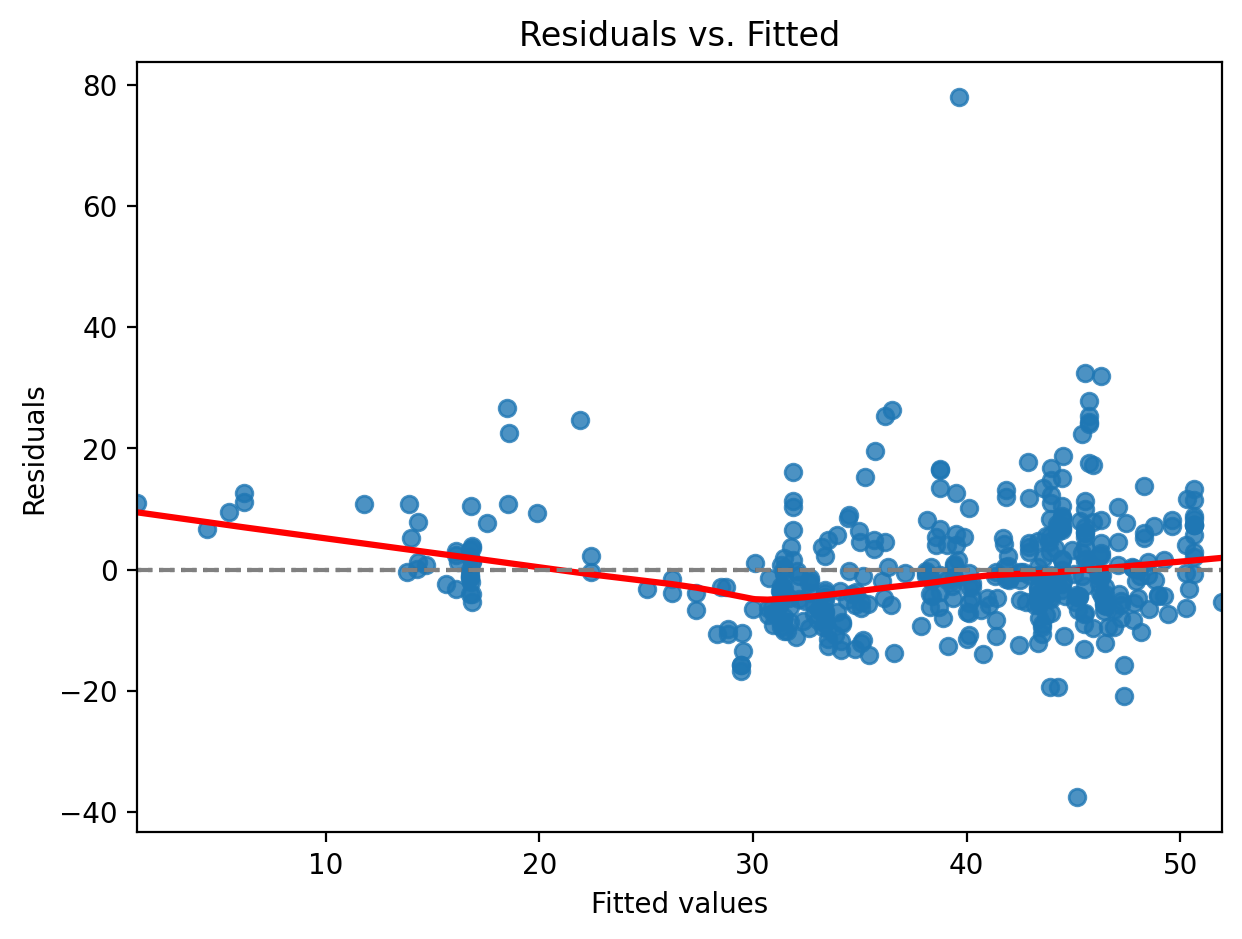

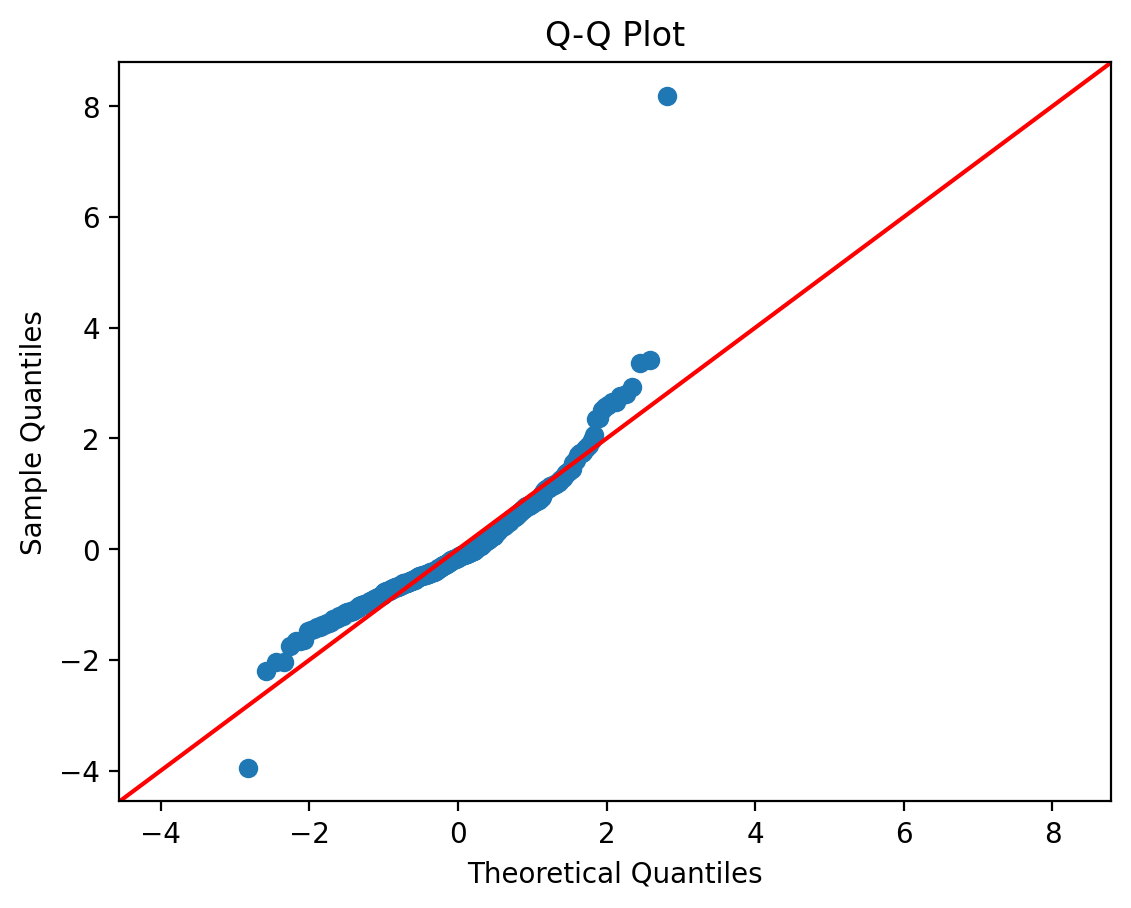

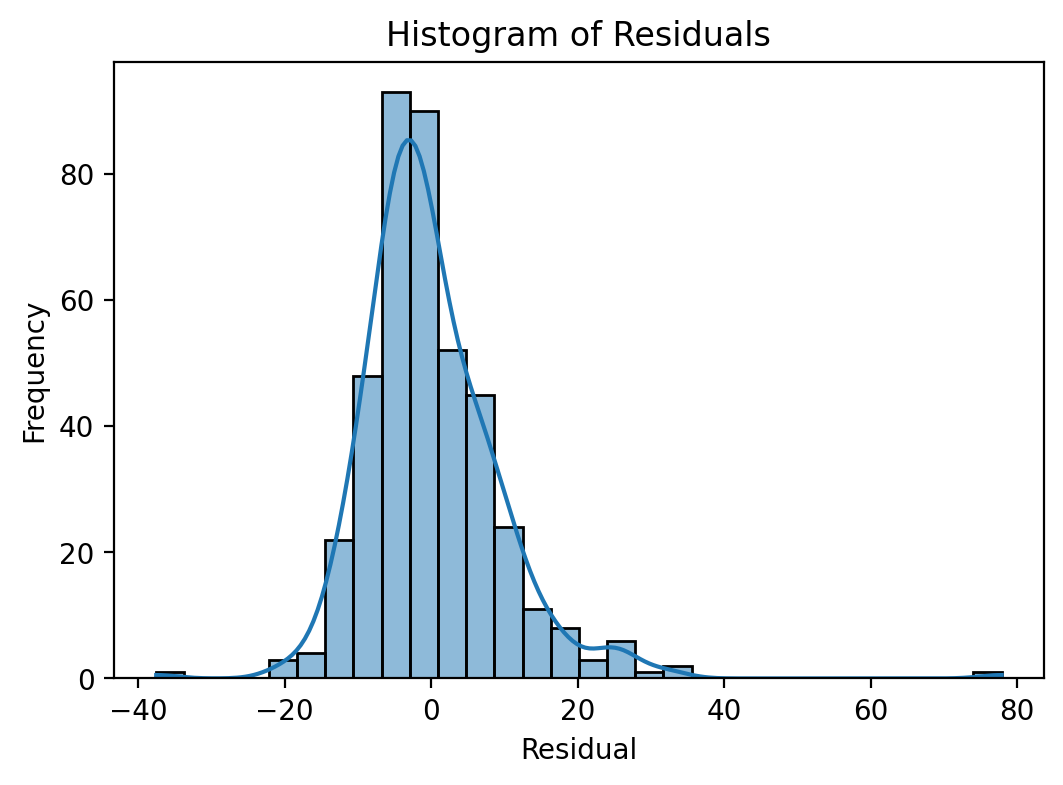

           feature       VIF
0            const  7.644453
1    dist_to_mrt_m  1.572342
2    n_convenience  1.584988
3  house_age_30_45  1.024729


In [39]:
# Your code here

# Residuals and fitted values
fitted_vals = model_backward.fittedvalues
residuals = model_backward.resid

plt.figure(figsize=(7, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(0, linestyle='--', color='gray')
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Prepare matrix for VIF (exclude const)
X_vif_bw = df_estate[features_backward]
X_vif_bw = sm.add_constant(X_vif_bw)

vif_data_bw = pd.DataFrame()
vif_data_bw["feature"] = X_vif_bw.columns
vif_data_bw["VIF"] = [variance_inflation_factor(X_vif_bw.values, i) for i in range(X_vif_bw.shape[1])]

print(vif_data_bw)

Finally, we can check the Out-of-sample Prediction or test error (MSPE):

In [114]:
X_test = test[features_forward].copy()
X_test = X_test.fillna(0)
X_test = sm.add_constant(X_test)

# True values
y_test = test['price_twd_msq']

# Predict using the best model (e.g., forward selection)
y_pred = model_forward.predict(X_test)

# Calculate MSPE (Mean Squared Prediction Error)
mspe = np.mean((y_test - y_pred) ** 2)
print(f"Test MSPE (out-of-sample): {mspe:.2f}")

Test MSPE (out-of-sample): 64.80


## Cross Validation

In Python, for cross-validation of regression models is usually done with cross_val_score from sklearn.model_selection.

To get the raw cross-validation estimate of prediction error (e.g., mean squared error), use:

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = df_estate[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']]
y = df_estate['price_twd_msq']

model = LinearRegression()

# 5-fold cross-validation, scoring negative MSE (so we multiply by -1 to get positive MSE)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Raw cross-validation estimate of prediction error (mean MSE)
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)

print(f"Cross-validated MSE: {cv_mse:.2f}")
print(f"Cross-validated RMSE: {cv_rmse:.2f}")

Cross-validated MSE: 95.90
Cross-validated RMSE: 9.79


# Summary

1. Do you understand all numerical measures printed in the SUMMARY of the regression report?
R-squared / Adj. R-squared: How much of the variability in the target (price) is explained by the model. Adjusted adjusts for number of predictors.

F-statistic & Prob (F-statistic): Test if the model overall is statistically significant (if predictors help).

Coefficients (coef): Effect size of each predictor on the outcome.

Std err: Uncertainty in the coefficient estimate.

t & P>|t|: Test if each coefficient is significantly different from zero.

[0.025 0.975]: 95% confidence interval for each coefficient.

Omnibus, Jarque-Bera: Tests if residuals are normally distributed.

Durbin-Watson: Checks for autocorrelation in residuals (around 2 is good).

AIC/BIC: Model quality metrics; lower is better, balancing fit and complexity.

Cond. No.: Indicates multicollinearity issues if very high.

2. Why do we need a cross-validation?

To check if your model generalizes well to new data, not just the data you trained on. It helps avoid overfitting by testing the model’s performance on unseen data.

3. What are the diagnostic plots telling us?
They help check model assumptions:

    Residuals vs Fitted: Look for patterns (should be random).

    Normal Q-Q plot: Residuals should be roughly normal.

    Scale-Location: Homoscedasticity (constant variance of residuals).

    Residuals vs Leverage: Detect influential points/outliers.

4. How to compare similar, but competing models?

Use Adjusted R-squared, AIC, or BIC (lower AIC/BIC is better).

Check cross-validation scores.

Consider simplicity (fewer predictors preferred if performance similar).

5. What is VIF telling us?

Variance Inflation Factor measures multicollinearity between predictors.

    VIF > 5 (or 10) means a predictor is highly correlated with others, which can mess up coefficient estimates.
    
6. How to choose best set of predictors for the model?

Use stepwise selection (forward, backward, or both) based on AIC/BIC.

Consider domain knowledge (which variables actually make sense).

Avoid multicollinearity (check VIF).

Use cross-validation to check if adding predictors really helps.